<a href="https://colab.research.google.com/github/Belajargihh/Machine_Learning/blob/main/Wine_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# 1. Install dan import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [48]:
# 2. Load dataset
df = pd.read_csv('/content/winequality-red.csv')  # Pastikan file di-upload ke Colab
X = df.drop(columns=['quality'])  # Hilangkan kolom target asli

In [49]:
# 3. Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# 4. Davies-Bouldin Index sebelum normalisasi
dbi_before = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    dbi_before.append(dbi)

In [51]:
# 5. Davies-Bouldin Index setelah normalisasi
dbi_after = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    dbi = davies_bouldin_score(X_scaled, labels)
    dbi_after.append(dbi)

In [52]:
# 6. Visualisasi grafik perbandingan
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [53]:
# Dataset sebelum normalisasi
print("Tabel Data Sebelum Normalisasi (5 Baris Pertama):")
display(X.head())

Tabel Data Sebelum Normalisasi (5 Baris Pertama):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [54]:
# Dataset sesudah normalisasi
print("Tabel Data Setelah Normalisasi (5 Baris Pertama):")
import numpy as np
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
display(X_scaled_df.head())

Tabel Data Setelah Normalisasi (5 Baris Pertama):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


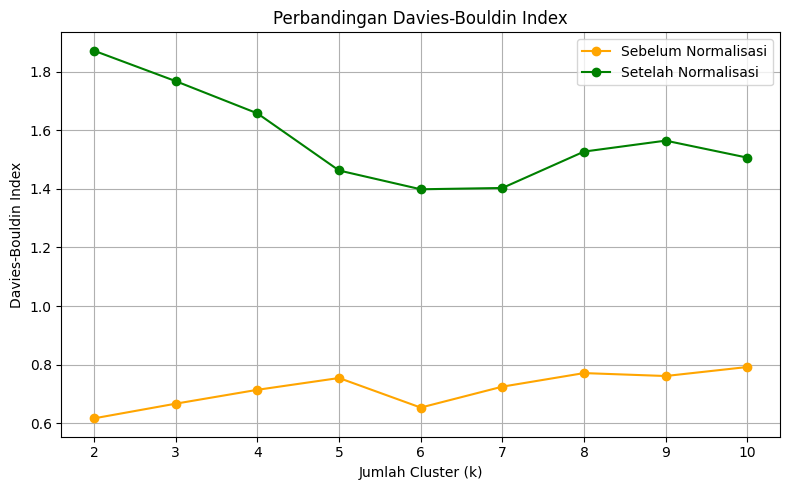

In [55]:
plt.figure(figsize=(8, 5))

plt.plot(range(2, 11), dbi_before, marker='o', color='orange', label='Sebelum Normalisasi')
plt.plot(range(2, 11), dbi_after, marker='o', color='green', label='Setelah Normalisasi')

plt.title("Perbandingan Davies-Bouldin Index")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Davies-Bouldin Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
# 7. Hitung Silhouette Score sebelum normalisasi
silhouette_before = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_before.append(score)

In [57]:
# 8. Hitung Silhouette Score setelah normalisasi
silhouette_after = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_after.append(score)

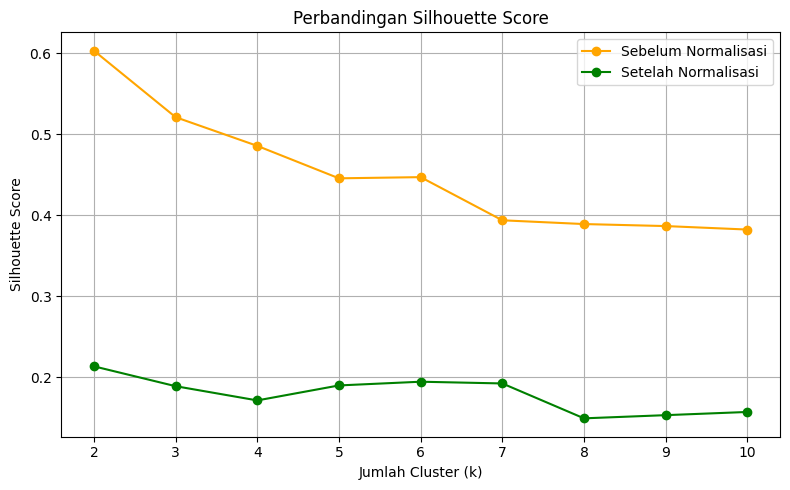

In [58]:
# 9. Visualisasi perbandingan
plt.figure(figsize=(8, 5))

plt.plot(range(2, 11), silhouette_before, marker='o', color='orange', label='Sebelum Normalisasi')
plt.plot(range(2, 11), silhouette_after, marker='o', color='green', label='Setelah Normalisasi')

plt.title("Perbandingan Silhouette Score")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
# 10. Evaluasi clustering untuk k=2 s.d. 10
results = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    dbi = davies_bouldin_score(X_scaled, labels)
    silhouette = silhouette_score(X_scaled, labels)
    results.append({'k': k, 'Davies-Bouldin': dbi, 'Silhouette': silhouette})

In [60]:
eval_df = pd.DataFrame(results)
display(eval_df.sort_values(by='Silhouette', ascending=False))

,k,Davies-Bouldin,Silhouette
0,2,1.871100,0.213730
4,6,1.398426,0.194729
5,7,1.402835,0.192591
3,5,1.462505,0.190139
1,3,1.767265,0.189204
2,4,1.657378,0.171636
8,10,1.506312,0.157380
7,9,1.564344,0.153439
6,8,1.526959,0.149508


In [61]:
# 11. Clustering akhir dengan jumlah cluster terbaik (misal: k=2)
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

In [62]:
# 12. Visualisasi 2D dengan PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

In [67]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


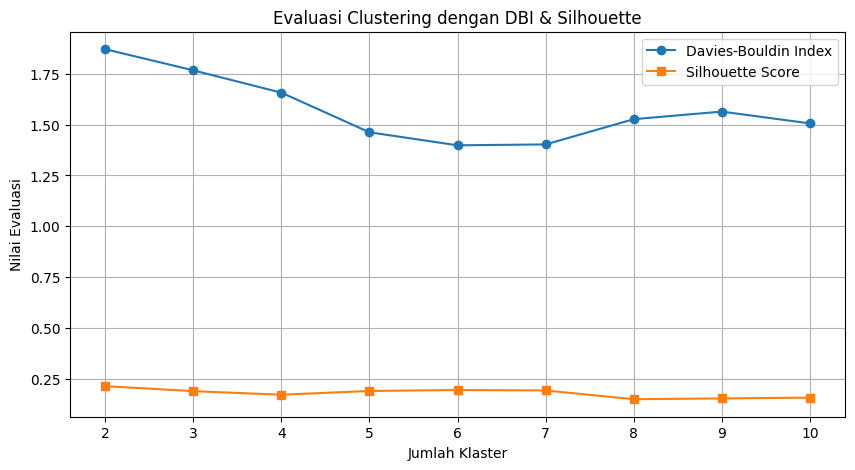

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), dbi_after, marker='o', label='Davies-Bouldin Index')
plt.plot(range(2, 11), silhouette_scores, marker='s', label='Silhouette Score')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Nilai Evaluasi')
plt.title('Evaluasi Clustering dengan DBI & Silhouette')
plt.legend()
plt.grid(True)
plt.show()


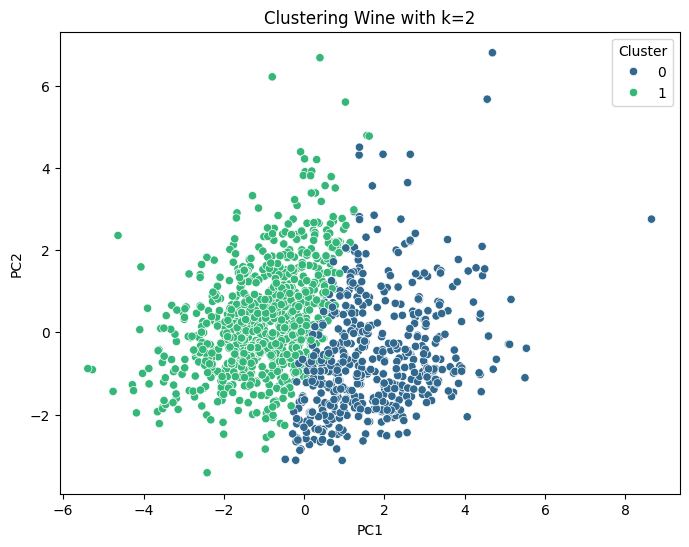

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title(f'Clustering Wine with k={k_optimal}')
plt.show()

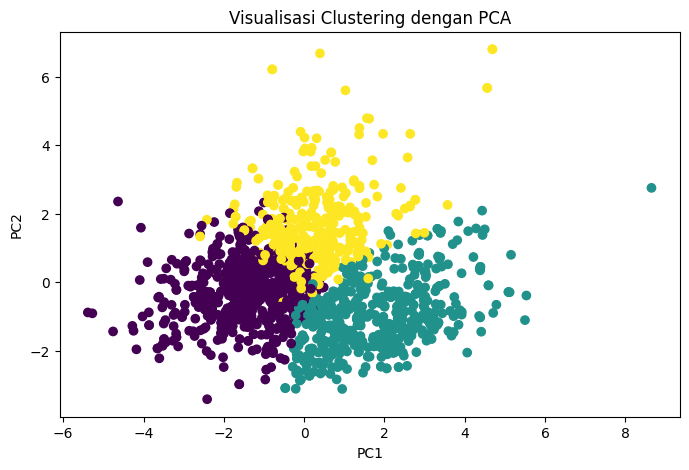

In [65]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Visualisasi Clustering dengan PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [64]:
# 13. Simpan hasil ke CSV
df.to_csv('hasil_clustering_wine.csv', index=False)
print("File hasil_clustering_wine.csv berhasil disimpan.")

File hasil_clustering_wine.csv berhasil disimpan.
